In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model  = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

# 케라스 7장 실습용 노트북
- Sequential - 간단한 초보자 모델
- 함수형 API - 그래프 같은 구조를 다룸.. ?
- Model 서브클래싱 - 완전히 밑바닥부터 만드는 방법

### 7.2.1 Sequential 모델에 대한 내용

층을 쌓는 방법에 대해서 두가지 방법을 알려줌


In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# 아직 bulid() 메소드가 호출되지 않았기 때문에 가중치가 없다
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [8]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.25293162, -0.24090266, -0.03632405,  0.09001556, -0.07500042,
         -0.10551357, -0.09695859, -0.27905613, -0.10505709, -0.00779727,
         -0.20843217, -0.18526231, -0.13725005, -0.27470738, -0.12816902,
          0.1077767 , -0.02819571,  0.045726  , -0.25483432, -0.08668734,
         -0.08039328, -0.10910484,  0.12964821,  0.27032143, -0.18586348,
         -0.18559785, -0.14954585, -0.03767857,  0.29201806, -0.0647859 ,
          0.03644726, -0.01693496,  0.27492428, -0.19568539, -0.12856899,
         -0.24769066,  0.12400833,  0.09235013, -0.08771659,  0.27294695,
         -0.25485787, -0.16853939, -0.15871415, -0.22847287,  0.01993418,
          0.29314905, -0.26085627, -0.19450459,  0.09804508, -0.04395089,
         -0.03268883, -0.16021651,  0.21685773,  0.12213787,  0.01277789,
          0.24739766, -0.12294804, -0.03190365, -0.17845184,  0.03640667,
         -0.07119018, -0.26789135,  0.04555

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64,activation='relu',name='my_first_layer'))
model.add(layers.Dense(10,activation='softmax',name='my_last_layer'))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 빌드를 안하고 써머리를 진행하면 오류가 난다 - build로 초기값을 넣거나 fit으로 훈련데이터를 넣어줘야한다
model1 = keras.Sequential(name='my_example_model')
model1.add(layers.Dense(64,activation='relu',name='my_first_layer'))
model1.add(layers.Dense(10,activation='softmax',name='my_last_layer'))
# model.build((None, 3))
model1.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [12]:
model = keras.Sequential()
# input을 정의해주면 build를 따로 정리할 필요가없음
model.add(keras.Input(shape=(3,))) #배치 크기가 아니라 각 샘플의 크기여야함

model.add(layers.Dense(64, activation='relu')) 

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.add(layers.Dense(10, activation='softmax')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 1,016
Trainable params: 1,016
Non-trainable params: 0
_________________________________________________________________


## 7.2.1 Functional API model

In [17]:
inputs = keras.Input(shape=(3,), name = 'my_inputs')
features = layers.Dense(64, activation = 'relu')(inputs) # 신기한 방법으로 인풋을 넣는다
outputs = layers.Dense(10, activation = 'softmax')(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [18]:
inputs.shape

TensorShape([None, 3])

In [20]:
inputs.dtype

tf.float32

In [21]:
# inputs 같은 값을 심볼릭 텐서라고 부른다

In [22]:
features = layers.Dense(64, activation = 'relu')(inputs)

In [23]:
features.shape

TensorShape([None, 64])

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_inputs (InputLayer)       [(None, 3)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


- 고객의 이슈 티켓에 우선순위를 지정하고 적절한 부서로 전달하는 예제를 생각해보자  

#### input
- 이슈티켓 제목(텍스트 입력)
- 이슈티켓 텍스트 본문(텍스트 입력)
- 사용자가 추가한 태그(범주형 원핫)

#### output
- 이슈티켓 우선순위 점수 0 1 
- 이슈티켓을 처리해야 할 부서 (소프트 맥스 결과값)

In [27]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 입력 정의
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

# 특성정의
features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation='relu')(features)

# output 정의
priority = layers.Dense(1, activation='sigmoid', name = 'priority')(features)
department = layers.Dense(num_departments, activation='softmax', name = 'department')(features)

# 모델 다시 정의?
model = keras.Model(inputs = [title, text_body, tags],
                   outputs = [priority, department])

In [29]:
import numpy as np

num_samples = 1280

# 인풋 데이터 (더미)
title_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0,2,size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0,2,size=(num_samples, num_tags))

# 타겟 데이터 (더미)
priority_data = np.random.random(size=(num_samples,1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer = 'rmsprop',
             loss = ['mean_squared_error', "categorical_crossentropy"],
             metrics = [['mean_absolute_error'],['accuracy']])

model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs= 1)

model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])

priority_preds, department_preds = model.predict(
    [title_data, text_body_data, tags_data])

40/40 [==============================] - 0s 7ms/step - loss: 28.5622 - priority_loss: 0.3268 - department_loss: 28.2354 - priority_mean_absolute_error: 0.4914 - department_accuracy: 0.1250


In [33]:
## 입력과 타깃 배열을 딕셔너리로 전달해서 모델 훈련하기

model.compile(optimizer = 'rmsprop',
             loss = {'priority':'mean_squared_error', 'department':'categorical_crossentropy'},
             metrics = {'priority':['mean_absolute_error'], 'department': ['accuracy']})

model.fit({'title':title_data, 'text_body' : text_body_data, 'tags':tags_data},
          {'priority': priority_data, 'department':department_data},
         epochs = 1)

model.evaluate({'title':title_data, 'text_body' : text_body_data, 'tags':tags_data},
          {'priority': priority_data, 'department':department_data})

priority_preds, department_preds = model.predict(
    {'title':title_data, 'text_body': text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 6ms/step - loss: 32.6583 - priority_loss: 0.3268 - department_loss: 32.3315 - priority_mean_absolute_error: 0.4914 - department_accuracy: 0.0680


In [49]:
priority_data.shape

(1280, 1)

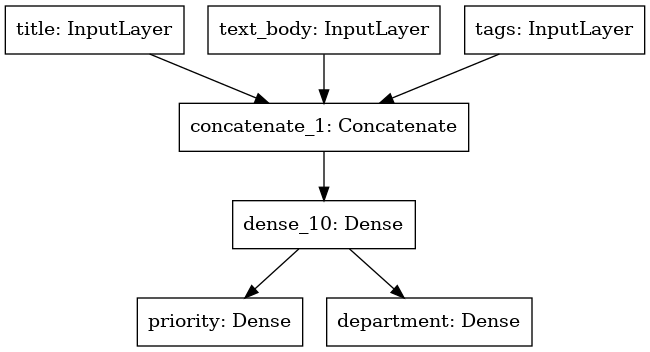

In [35]:
keras.utils.plot_model(model, 'ticket_classifier.png')

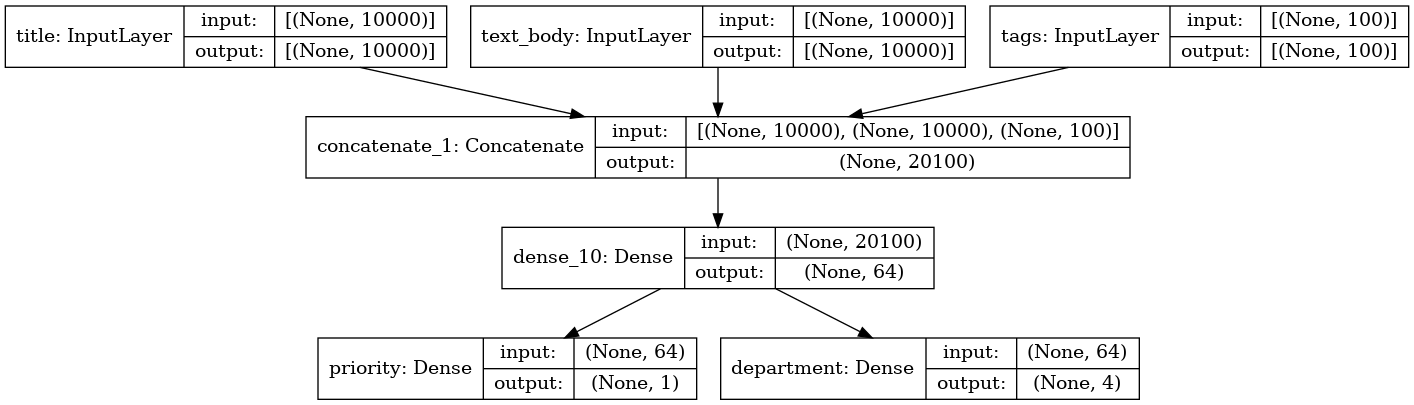

In [37]:
keras.utils.plot_model(
    model, 'ticket_classifier_with_shape_info.png', show_shapes=True)

In [38]:
model.layers

In [39]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [40]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate_1')>

In [45]:
features = model.layers[4].output
difficulty = layers.Dense(3,activation='softmax', name = 'difficulty')(features)

new_model = keras.Model(
    inputs = [title, text_body, tags],
    outputs = [priority, department, difficulty])

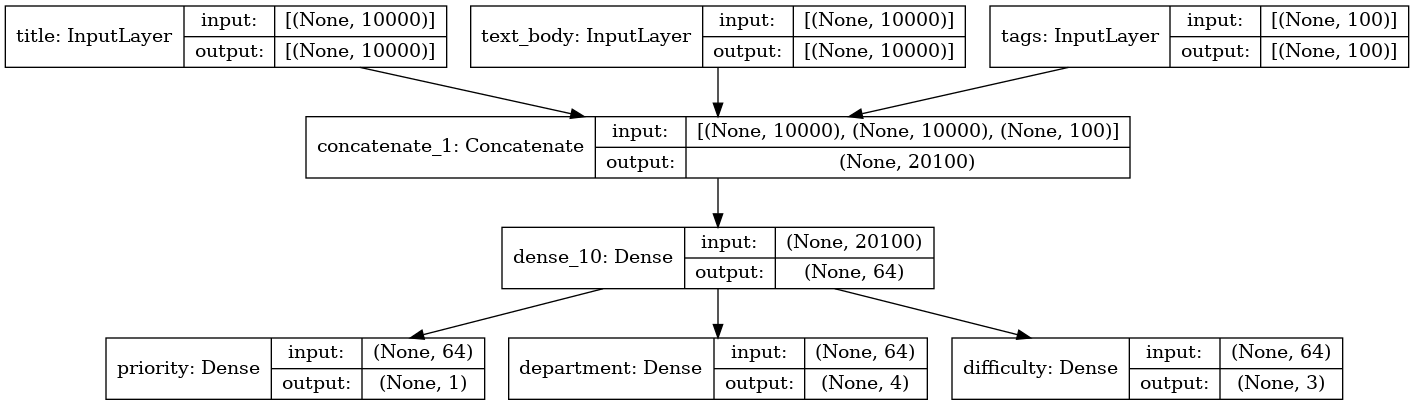

In [46]:
keras.utils.plot_model(
    new_model, "update_ticket.png", show_shapes=True)

## 7.2.3 Model 서브 클래싱

In [50]:
class CustomerTicketModel(keras.Model):
    def __init__(self, num_departments):
        super().__init__() # 부모 클래스 상속
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation='relu')
        self.priority_scorer = layers.Dense(1, activation='sigmoid')
        self.department_classifier = layers.Dense(
            num_departments, activation='softmax')
    def call(self, inputs):
        title = inputs['title']
        text_body = inputs['text_body']
        tags = inputs['tags']
        
        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        
        return priority, department

In [53]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {'title' : title_data, 'text_body':text_body_data,'tags' : tags_data})

In [55]:
department

<tf.Tensor: shape=(1280, 4), dtype=float32, numpy=
array([[0.18071282, 0.21913539, 0.521969  , 0.07818279],
       [0.05511457, 0.49047577, 0.3661366 , 0.08827303],
       [0.03300843, 0.31973135, 0.5805571 , 0.06670319],
       ...,
       [0.20100752, 0.46066985, 0.17267555, 0.16564709],
       [0.10184661, 0.45168686, 0.3972787 , 0.04918788],
       [0.15346375, 0.30885294, 0.41024458, 0.1274387 ]], dtype=float32)>

In [58]:
model.compile(optimizer='rmsprop',
             loss = ['mean_squared_error', 'categorical_crossentropy'],
             metrics = [['mean_absolute_error'],['accuracy']])

model.fit({'title' : title_data, 'text_body':text_body_data,'tags' : tags_data},
         [priority_data, department_data],
         epochs = 1)

model.evaluate({'title' : title_data, 'text_body':text_body_data,'tags' : tags_data},
              [priority_data, department_data])

priority_preds, department_preds = model.predict(
    {'title':title_data, 'text_body': text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 8ms/step - loss: 23.6175 - output_1_loss: 0.3268 - output_2_loss: 23.2906 - output_1_mean_absolute_error: 0.4914 - output_2_accuracy: 0.1258


In [60]:
class Classifier(keras.Model):
    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes ==2:
            num_units = 1
            activation = 'sigmoid'
        else:
            num_units = num_classes
            activation = 'softmax'
        self.dense = layers.Dense(num_units, activation=activation)
    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs = inputs, outputs = outputs)

In [65]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation = 'sigmoid')(inputs)
binary_classifier = keras.Model(inputs = inputs, outputs = outputs)

class MyModel(keras.Model):
    def __init__(self, num_classes = 2):
        super().__init__()
        self.dense = layers.Dense(64, activation = 'relu')
        self.classifier = binary_classifier
    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

In [66]:
MyModel = MyModel()

In [70]:
MyModel.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [71]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28*28))
    features = layers.Dense(512, activation = 'relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation = 'softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000,28*28)).astype('float32') / 255
test_images = test_images.reshape((10000,28*28)).astype('float32') / 255

train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()

model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels,
          epochs=3,
          validation_data = (val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)

11501568/11490434 [==============================] - 0s 0us/step


In [72]:
## 사용자 정의 지표 만들기

In [76]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        # keras.metrics.Metric 이거를 상속
        super().__init__(name=name, **kwargs)
        
        # 기존 metric에 weight 를 추가
        
        # mse_sum이라는 함수를 추가
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zero')
        
        # total_sampels 라는 함수를 추가
        self.total_samples = self.add_weight(
            name='total_samples', initializer='zeros',dtype = 'int32')
    
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)
        

In [77]:
model = get_mnist_model()

model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy', RootMeanSquaredError()])

model.fit(train_images, train_labels,
         epochs = 3,
         validation_data = (val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2936 - accuracy: 0.9124 - rmse: 7.1856 - val_loss: 0.1478 - val_accuracy: 0.9581 - val_rmse: 7.3604
Epoch 2/3
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1657 - accuracy: 0.9541 - rmse: 7.3569 - val_loss: 0.1236 - val_accuracy: 0.9668 - val_rmse: 7.4087
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1074 - accuracy: 0.9727 - rmse: 7.4345


In [79]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_accuracy',
        patience = 2
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.h5',
        monitor='val_loss',
        save_best_only=True
    )
]

model = get_mnist_model()
model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels,
         epochs = 10,
         callbacks = callbacks_list,
         validation_data = (val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2983 - accuracy: 0.9116 - val_loss: 0.1484 - val_accuracy: 0.9573
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1681 - accuracy: 0.9523 - val_loss: 0.1176 - val_accuracy: 0.9691
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1372 - accuracy: 0.9617 - val_loss: 0.1172 - val_accuracy: 0.9697
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1276 - accuracy: 0.9667 - val_loss: 0.1079 - val_accuracy: 0.9747
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1149 - accuracy: 0.9702 - val_loss: 0.1041 - val_accuracy: 0.9771
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1105 - accuracy: 0.9728 - val_loss: 0.1070 - val_accuracy: 0.9755
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1041 - accuracy: 0.9752 - val_loss: 0.1141 - val_accuracy:

In [85]:
model = keras.models.load_model("checkpoint_path.h5")
model.weights

[<tf.Variable 'dense_29/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.04821116,  0.05166771, -0.01843371, ...,  0.06368734,
         -0.01871908, -0.0114801 ],
        [-0.04437327,  0.04492354,  0.01081058, ...,  0.04495358,
          0.06114893, -0.03410215],
        [ 0.04945493, -0.03451645,  0.01762015, ...,  0.06150921,
          0.03691865, -0.00785819],
        ...,
        [ 0.01444   , -0.04751959,  0.03711358, ..., -0.03780796,
         -0.0259922 , -0.06595489],
        [ 0.01041049, -0.05050819,  0.04670251, ...,  0.0276284 ,
          0.04645989, -0.01661168],
        [-0.0104805 , -0.04785427,  0.02571625, ..., -0.00368015,
         -0.02381378, -0.04248112]], dtype=float32)>,
 <tf.Variable 'dense_29/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.01289838, -0.04214972, -0.02449162, -0.02149598, -0.02478606,
        -0.06047064, -0.04325246, -0.17728202, -0.02632915, -0.07206406,
        -0.11044975, -0.07556492, -0.17150407, -0.1291509 , -0.08672331

In [90]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
    def on_epochs_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []
                   
    

In [91]:
model = get_mnist_model()

model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(train_images, train_labels,
         epochs = 10,
          callbacks=[LossHistory()],
         validation_data = (val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2914 - accuracy: 0.9140 - val_loss: 0.1642 - val_accuracy: 0.9515
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1641 - accuracy: 0.9535 - val_loss: 0.1205 - val_accuracy: 0.9694
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1372 - accuracy: 0.9633 - val_loss: 0.1424 - val_accuracy: 0.9646
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1253 - accuracy: 0.9676 - val_loss: 0.1092 - val_accuracy: 0.9727
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1146 - accuracy: 0.9706 - val_loss: 0.1191 - val_accuracy: 0.9737
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.1092 - accuracy: 0.9736 - val_loss: 0.1077 - val_accuracy: 0.9754
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1028 - accuracy: 0.9752 - val_loss: 0.1068 - val_accuracy: